In [1]:
import os
import sys
import torch
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
sys.path.append(os.path.abspath(os.path.join('..')))

In [28]:
sns.set_theme()

In [2]:
logs = r"D:\felix-ml\logs\train\runs\2023-08-02_22-20-37\csv\version_0\metrics.csv"
df = pd.read_csv(logs)

In [4]:
df2 = df[~df["epoch"].isna()]
df2 = df2.drop(["step", "train/loss_step", "test/loss_step"], axis=1)
df2

,epoch,val/loss_step,val/loss_epoch,train/loss_epoch,test/loss_epoch
0,0.0,NaN,NaN,NaN,NaN
1,0.0,NaN,NaN,NaN,NaN
2,0.0,NaN,NaN,NaN,NaN
3,0.0,NaN,NaN,NaN,NaN
4,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...
3479,49.0,NaN,NaN,NaN,NaN
3480,49.0,NaN,NaN,NaN,NaN
3544,49.0,NaN,164.612457,NaN,NaN
3545,49.0,NaN,NaN,121.058472,NaN


<Axes: xlabel='epoch', ylabel='loss'>

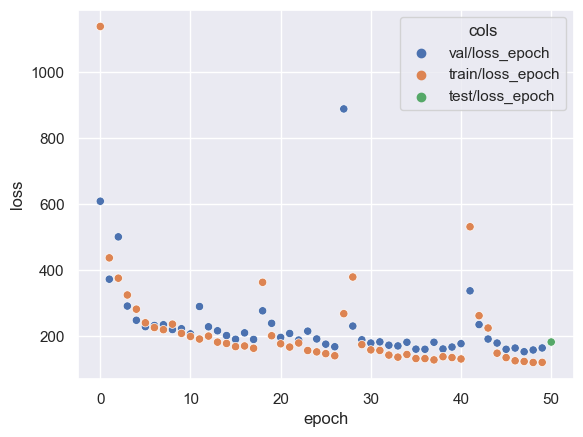

In [32]:
dfm = df2.melt("epoch", var_name='cols', value_name='loss')
dfm = dfm[~dfm["loss"].isna()]
sns.scatterplot(data=dfm, x="epoch", y="loss", hue="cols")

In [2]:
from src.models.CVAE import CVAELitModule

model = CVAELitModule.load_from_checkpoint(
    r"D:\felix-ml\logs\train\runs\2023-08-02_22-20-37\checkpoints\epoch_049.ckpt")

data_dir = "../data/FDP/"